# Solving the differential equation by finite difference method

instability solution


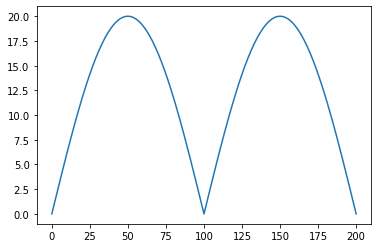

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math 
Lx = 2
Nx = 200
Lt = 4
Nt = 5000
V0 = np.zeros(Nx+1,float)
V1 = np.zeros(Nx+1,float)
hx = Lx/Nx
ht = Lt/Nt
alpha = ht/hx**2
if alpha>0.5:
    print("instability solution")
for i in range(Nx+1):
    V0[i] = 20*abs(math.sin(math.pi*hx*i))
    # print(i,V0[i])
plt.plot(list(range(Nx+1)),V0)
plt.show()

In [6]:
def pardif(Lx, Lt, Nx, Nt, func, x0, xL, t, a):
    
    V = [[func((j+1)*0.1)] for j in range(Nx)]
    n = int(t/(Lt/Nt))

    for k in range(n):
        for i in range(Nx):

            if i == 0:
                V[i][0] = V[i][0]*(1-2*a)+V[i+1][0]*a
            elif i == Nx-1:
                V[i][0] = V[i-1][0]*a+V[i][0]*(1-2*a)
            else:
                V[i][0] = V[i-1][0]*a+V[i][0]*(1-2*a)+V[i+1][0]*a

    return V

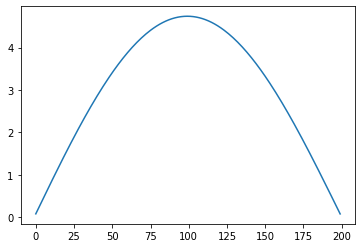

In [8]:
V1 = pardif(2, 4, 200, 5000, lambda x: 20*abs(math.sin(math.pi*x)), 0, 0, 4, 0.5)
plt.plot(list(range(len(V1))),V1)

0 0.0
1 6.182745039597784
2 11.759796643100088
3 16.184798212042537
4 19.02425388207116
5 19.999996002667363
6 19.016435867846685
7 16.169928076391802
8 11.739331140830199
9 6.158689076347239
10 0.0252897786075458
11 6.206791117053919
12 11.780243342244297
13 16.19964246928702
14 19.032041477790322
15 19.999964024015874
16 19.00858744761737
17 16.155032086111177
18 11.7188468681576
19 6.13462326576613
20 0.0505795167784327


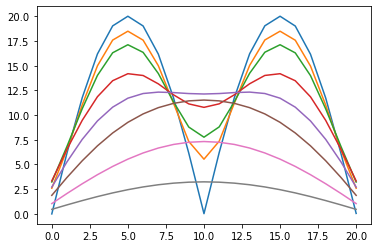

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
Lx=2
Nx=20
Lt=4
Nt=5000
pi=22/7

V0=np.zeros(Nx+1)
V1=np.zeros(Nx+1)
hx=Lx/Nx
ht=Lt/Nt
alpha=ht/(hx**2)

if alpha>0.5:
 print("instability detected")
	
x=[]

for i in range(Nx+1):
 V0[i]=20*abs(math.sin(pi*hx*i))
 print(i,V0[i])
 x.append(i)
plt.plot(x,V0)

y=[]
	
for j in range(1, 1001):
 y.append(j)
 for i in range(Nx+1):
  if i==0:
   V1[i]=(1-2*alpha)*V0[i]+alpha*V0[i+1]
  elif i==Nx:
   V1[i]=alpha*V0[i-1]+(1-2*alpha)*V0[i]
  else:
   V1[i]=alpha*V0[i-1]+(1-2*alpha)*V0[i]+alpha*V0[i+1]
 for i in range(Nx+1):
  V0[i]=V1[i]
 if(j==10 or j==20 or j==50 or j==100 or j==200 or j==500 or j==1000):
  plt.plot(x,V1)



plt.show()